In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer  
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import itertools

#plt.style.use('seaborn-poster')
%matplotlib inline

VECTOR_DIR = 'word2vec.model.bin'
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 250
n_classes = ["GI", 
         "P", 
         "Oph", 
         "Uro", 
         "M",
         ]

Load Data

In [2]:
train_texts = open('data/5_class/train_contents.txt').read().split('\n')
train_labels = open('data/5_class/train_labels.txt').read().split('\n')
test_texts = open('data/5_class/test_contents.txt').read().split('\n')
test_labels = open('data/5_class/test_labels.txt').read().split('\n')
all_text = train_texts + test_texts

In [3]:

count_v0= CountVectorizer();  
counts_all = count_v0.fit_transform(all_text);
count_v1= CountVectorizer(vocabulary=count_v0.vocabulary_);  
counts_train = count_v1.fit_transform(train_texts);   
print ("the shape of train is "+repr(counts_train.shape))
count_v2 = CountVectorizer(vocabulary=count_v0.vocabulary_);  
counts_test = count_v2.fit_transform(test_texts);  
print ("the shape of test is "+repr(counts_test.shape))
tfidftransformer = TfidfTransformer();    
train_data = tfidftransformer.fit(counts_train).transform(counts_train);
test_data = tfidftransformer.fit(counts_test).transform(counts_test); 


the shape of train is (15655, 39014)
the shape of test is (500, 39014)


data to vector

In [4]:
x_train = train_data
y_train = train_labels
x_test = test_data
y_test = test_labels

plot 

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(10, 8))
    fig = plt.rcParams['font.size'] = 15
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Naive Bayes

[[99  1  0  1  0]
 [ 0 95  0  0  6]
 [ 0  8 93  0  0]
 [ 0  4  0 91  1]
 [ 0  7  0  1 93]]
accuracy:0.942
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       101
           2       0.83      0.94      0.88       101
           3       1.00      0.92      0.96       101
           4       0.98      0.95      0.96        96
           5       0.93      0.92      0.93       101

   micro avg       0.94      0.94      0.94       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500



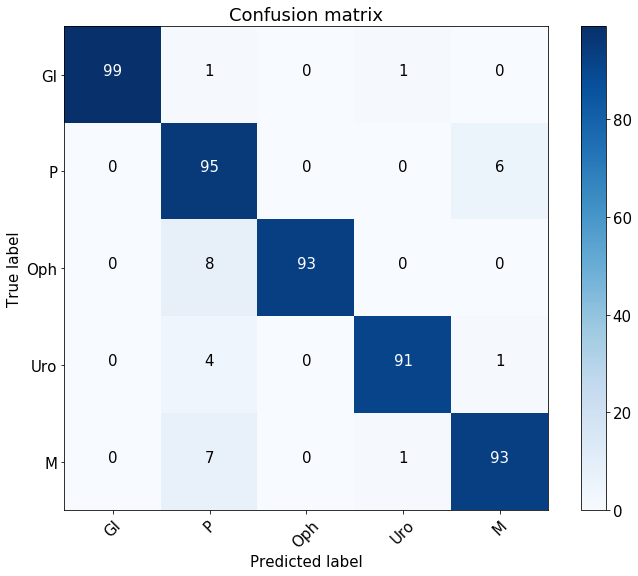

In [6]:
from sklearn.naive_bayes import MultinomialNB  

clf = MultinomialNB(alpha = 0.01)   
clf.fit(x_train, y_train);  
preds = clf.predict(x_test);

print(metrics.confusion_matrix(y_test, preds))

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("accuracy:"+ str(accuracy_score(y_test, preds)))

print(classification_report(y_pred=preds, y_true=y_test))

cm = metrics.confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, n_classes, title='Confusion matrix')

KNN

accuracy:0.866
[[88 11  0  0  2]
 [ 0 99  0  0  2]
 [ 0 18 81  1  1]
 [ 0 23  1 70  2]
 [ 0  5  0  1 95]]
              precision    recall  f1-score   support

           1       1.00      0.87      0.93       101
           2       0.63      0.98      0.77       101
           3       0.99      0.80      0.89       101
           4       0.97      0.73      0.83        96
           5       0.93      0.94      0.94       101

   micro avg       0.87      0.87      0.87       500
   macro avg       0.91      0.86      0.87       500
weighted avg       0.90      0.87      0.87       500



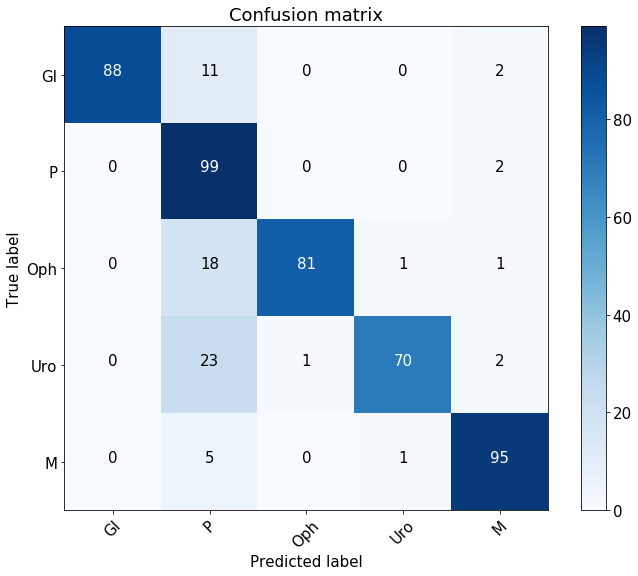

In [20]:
from sklearn.neighbors import KNeighborsClassifier  

  
knnclf = KNeighborsClassifier(n_neighbors=40)
knnclf.fit(x_train,y_train)
preds = knnclf.predict(x_test);

from sklearn import metrics
print("accuracy:"+ str(accuracy_score(y_test, preds)))
print(metrics.confusion_matrix(y_test, preds))

from sklearn.metrics import classification_report
print(classification_report(y_pred=preds, y_true=y_test))

cm = metrics.confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, n_classes,
                      title='Confusion matrix')

SVM

accuracy:0.942
[[97  2  0  1  1]
 [ 0 98  0  0  3]
 [ 0  8 91  1  1]
 [ 0  9  0 86  1]
 [ 0  1  0  1 99]]
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       101
           2       0.83      0.97      0.89       101
           3       1.00      0.90      0.95       101
           4       0.97      0.90      0.93        96
           5       0.94      0.98      0.96       101

   micro avg       0.94      0.94      0.94       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500



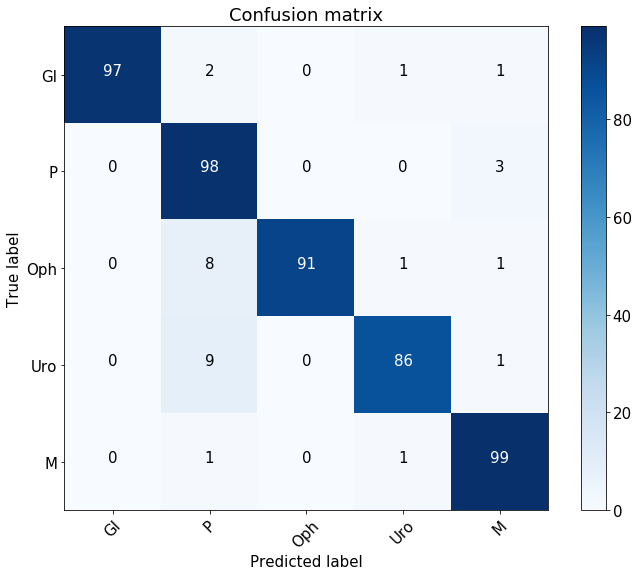

In [8]:
from sklearn.svm import SVC   
svclf = SVC(kernel = 'linear') 
svclf.fit(x_train,y_train)  
preds = svclf.predict(x_test);  

from sklearn import metrics
print("accuracy:"+ str(accuracy_score(y_test, preds)))
print(metrics.confusion_matrix(y_test, preds))

from sklearn.metrics import classification_report
print(classification_report(y_pred=preds, y_true=y_test))

cm = metrics.confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, n_classes,
                      title='Confusion matrix')